<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/2_1_3_1_Lab_Coffee_Roasting_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Coffee Roasting in Tensor Flow

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Weights

In [3]:
# weights obtained by training in TensorFlow
W1_tmp1 = np.array([[-10.0355835 , 0.08937748, -17.92395],
                   [ -0.21964656, -8.377202, -14.961986]])
b1_tmp1 = np.array([-10.929696, -10.53901, -2.5372286])
W2_tmp1 = np.array([[-41.07575],
                   [-36.81419],
                   [29.82899]])
b2_tmp1 = np.array( [-8.462966])

In [4]:
W1_tmp2 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1_tmp2 = np.array([-9.87, -9.28,  1.01])
W2_tmp2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2_tmp2 = np.array([15.54])

## Dataset

In [5]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Stanford-Andrew-Ng-Machine-Learning-Specialization/main/data/'
path += 'coffee.csv'

coffee = pd.read_csv(path)
coffee

,Temperature,Duration,Quality
0,185.32,12.69,1.0
1,259.92,11.87,0.0
2,231.01,14.41,0.0
3,175.37,11.72,0.0
4,187.12,14.13,1.0
...,...,...,...
195,223.78,15.30,0.0
196,266.63,12.48,0.0
197,273.68,13.10,0.0
198,220.61,12.80,1.0


In [6]:
X = coffee.drop('Quality', axis=1).values
Y = coffee[['Quality']].values
X.shape, Y.shape

((200, 2), (200, 1))

## Plot Coffee Roasting Data

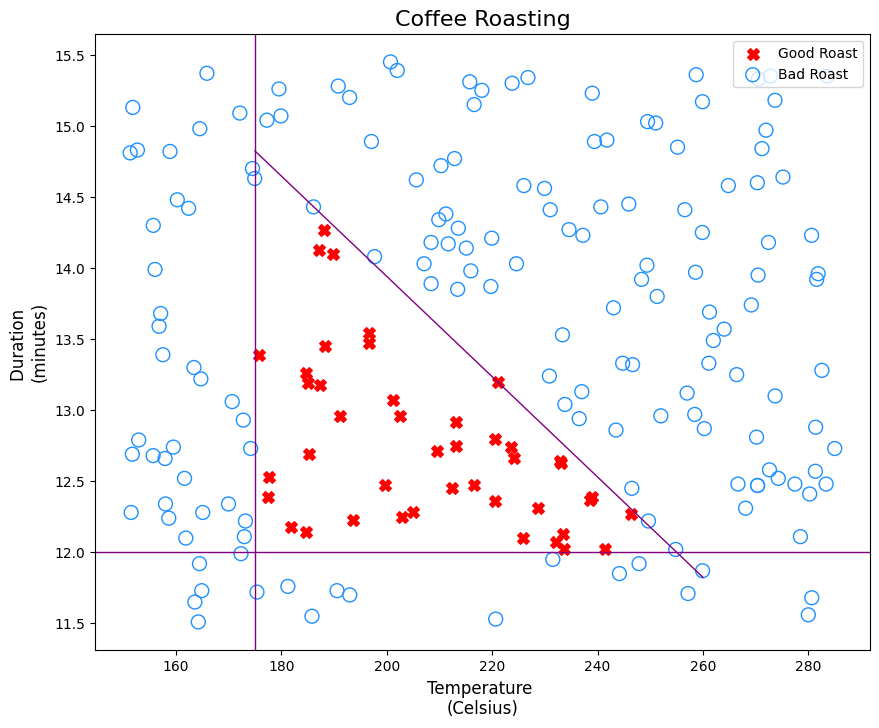

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

y = Y.reshape(-1, )
# temperature on x-axis, duration on y-axis
ax.scatter(X[y==1, 0], X[y==1, 1], s=70, marker='X', c='r', label='Good Roast')
ax.scatter(X[y==0, 0], X[y==0, 1], s=100, marker='o', facecolor='none',
           edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
ax.axhline(y=12, color='purple', linewidth=1)
ax.axvline(x=175, color='purple', linewidth=1)
tr = np.linspace(175, 260, 50)
ax.plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)

ax.set_title('Coffee Roasting', size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')

plt.show()

## Normalize Data

- Fitting the weights to the data (back-propagation) proceeds more quickly when the data is normalize
- This procedure uses the Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/)
- Steps
 1. Create a "Normalization Layer": this is not a layer in your model
 2. `adapt` the data (learns the mean and variance of the dataset and stores the values internally
 2. normalize the data

In [8]:
# max and min temperature
np.max(X[:, 0]), np.min(X[:, 0])

(284.99, 151.32)

In [9]:
# max and min duration
np.max(X[:, 1]), np.min(X[:, 1])

(15.45, 11.51)

In [10]:
norm_1 = tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(X)
Xn = norm_1(X)

In [11]:
# max and min temperature
np.max(Xn[:, 0]), np.min(Xn[:, 0])

(1.6596596, -1.6853083)

In [12]:
# max and min duration
np.max(Xn[:, 1]), np.min(Xn[:, 1])

(1.7897574, -1.7021072)

## Tile Data

In [13]:
# tile/copy data to increase the training set size and
#  reduce the number of epochs
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

In [14]:
X.shape, Xn.shape, Xt.shape

((200, 2), TensorShape([200, 2]), (200000, 2))

In [15]:
Y.shape, Yt.shape

((200, 1), (200000, 1))

In [16]:
Xn[0:5, :], Xt[0:5, :], Xt[200:205]

(<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
 array([[-0.83448976, -0.6563208 ],
        [ 1.0323066 , -1.3830538 ],
        [ 0.30886003,  0.8680468 ],
        [-1.0834796 , -1.5159925 ],
        [-0.7894467 ,  0.6198942 ]], dtype=float32)>,
 array([[-0.83448976, -0.6563208 ],
        [ 1.0323066 , -1.3830538 ],
        [ 0.30886003,  0.8680468 ],
        [-1.0834796 , -1.5159925 ],
        [-0.7894467 ,  0.6198942 ]], dtype=float32),
 array([[-0.83448976, -0.6563208 ],
        [ 1.0323066 , -1.3830538 ],
        [ 0.30886003,  0.8680468 ],
        [-1.0834796 , -1.5159925 ],
        [-0.7894467 ,  0.6198942 ]], dtype=float32))

In [17]:
Y[0:5], Yt[0:5], Yt[200:205], Yt[400:405]

(array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]),
 array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]),
 array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]),
 array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]))

## TensorFlow Model

<img src='https://drive.google.com/uc?export=view&id=1pNscrM4uMbFa1Lvhqv6YyNC-Ivy2i5hh'>



In [18]:
tf.random.set_seed(1234)

model = Sequential([
    tf.keras.Input(shape=(2, )),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

The `model.summary()` provides a description of the network:

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
layer1 = model.get_layer('layer1')
layer2 = model.get_layer('layer2')

In [21]:
# number of variables in input * number nodes + number nodes
L1_num_params = layer1.input.shape[1] * layer1.units + layer1.units # W1 parameters + b_parameters
L2_num_params = layer2.input.shape[1] * layer2.units + layer2.units
L1_num_params, L2_num_params

(9, 4)

## Initial Weights

In [22]:
W1, b1 = layer1.get_weights()
W1, b1

(array([[-0.02275932,  0.67524076, -0.6433762 ],
        [-0.9662816 , -0.7708366 ,  0.191764  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [23]:
W2, b2 = layer2.get_weights()
W2, b2

(array([[-1.0233762],
        [-0.6561596],
        [ 0.1944654]], dtype=float32),
 array([0.], dtype=float32))

The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.BinaryCrossentropy()
)

In [25]:
model.fit(Xt, Yt, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1244
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1035
Epoch 4/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0248
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0134
Epoch 6/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0091
Epoch 7/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0064
Epoch 8/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0046
Epoch 9/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0033
Epoch 10/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0025


## Epochs and batches

In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1839
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

## Updated weights

In [26]:
W1, b1 = layer1.get_weights()
W1, b1

(array([[ 14.101149  ,  -0.04842315, -10.897064  ],
        [ 11.730996  ,  -8.649427  ,  -0.26449367]], dtype=float32),
 array([  1.6935228, -10.829875 , -11.904009 ], dtype=float32))

In [27]:
W2, b2 = layer2.get_weights()
W2, b2

(array([[-41.500275],
        [-42.91971 ],
        [-48.16392 ]], dtype=float32),
 array([24.868309], dtype=float32))

## Predictions

In [28]:
predictions = model.predict(Xn)
predictions[0:5] # these are probabilities

7/7 [==============================] - 0s 2ms/step


array([[1.000000e+00],
       [5.607681e-13],
       [5.981738e-08],
       [5.898995e-19],
       [1.000000e+00]], dtype=float32)

In [29]:
y_hat = (predictions >= 0.5).astype(int)
y_hat[0:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [30]:
sum(y_hat == Y) / len(Y) # 100% accuracy

array([1.])

## Layer Functions

Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.

In [31]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [32]:
def plt_prob(ax, fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    x0_space = np.linspace(150, 285, 40)
    x1_space = np.linspace(11.5, 15.5, 40)

    # get probability for X0, X1 ranges
    tmp_x0, tmp_x1 = np.meshgrid(x0_space, x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            x = np.array([[tmp_x0[i, j],
                           tmp_x1[i, j]]])
            z[i, j] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z, cmap=new_cmap,
                        norm=cm.colors.Normalize(vmin=0, vmax=1),
                        shading='nearest', alpha=0.9)
    ax.figure.colorbar(pcm, ax=ax)

In [33]:
def plt_layer(X, Y, W1, b1, norm_1):
    y = Y.reshape(-1,)

    fig, ax = plt.subplots(1, W1.shape[1], figsize=(16, 4))
    for i in range(W1.shape[1]):
        layerf = lambda x: sigmoid(np.dot(norm_1(x), W1[:, i]) + b1[i])
        plt_prob(ax[i], layerf)
        ax[i].scatter(X[y==1, 0], X[y==1, 1], s=70,
                      marker='X', c='r')
        ax[i].scatter(X[y==0, 0], X[y==0, 1], s=100,
                      marker='o', facecolor='none',
                      edgecolors='dodgerblue', linewidth=1)
        ax[i].axhline(y=12, color='purple', linewidth=1)
        ax[i].axvline(x=175, color='purple', linewidth=1)
        tr = np.linspace(175, 260, 50)
        ax[i].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
        ax[i].set_title(f'Layer 1, unit {i}')
        ax[i].set_xlabel('Temperature \n(Celsius)', size=12)
    ax[0].set_ylabel('Duration \n(minutes)', size=12)

    plt.show()

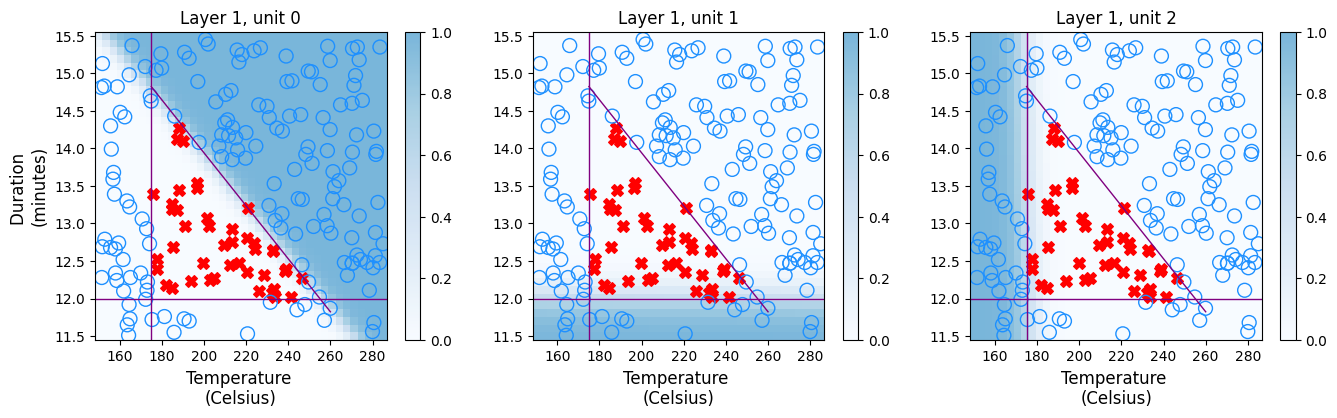

In [34]:
plt_layer(X, Y, W1, b1, norm_1)

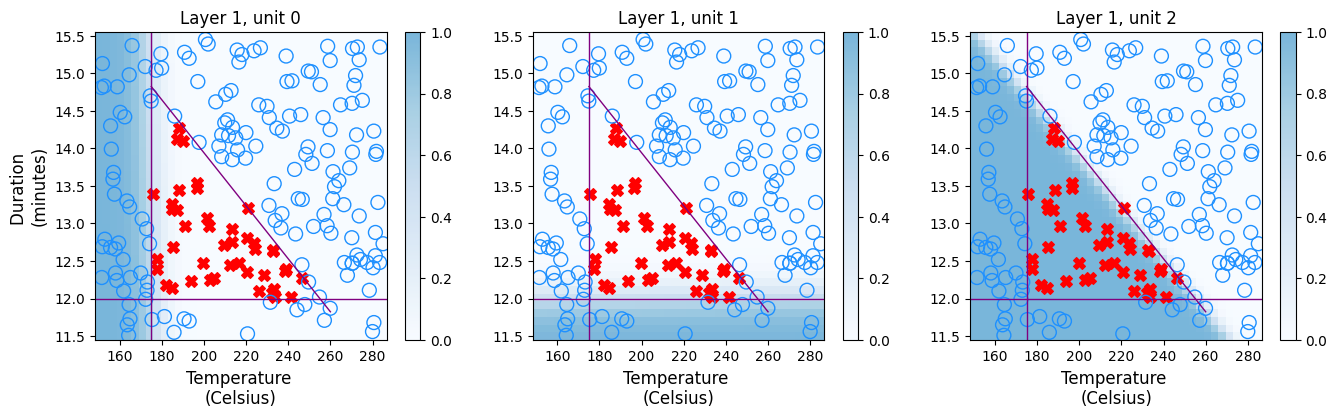

In [35]:
plt_layer(X, Y, W1_tmp1, b1_tmp1, norm_1)

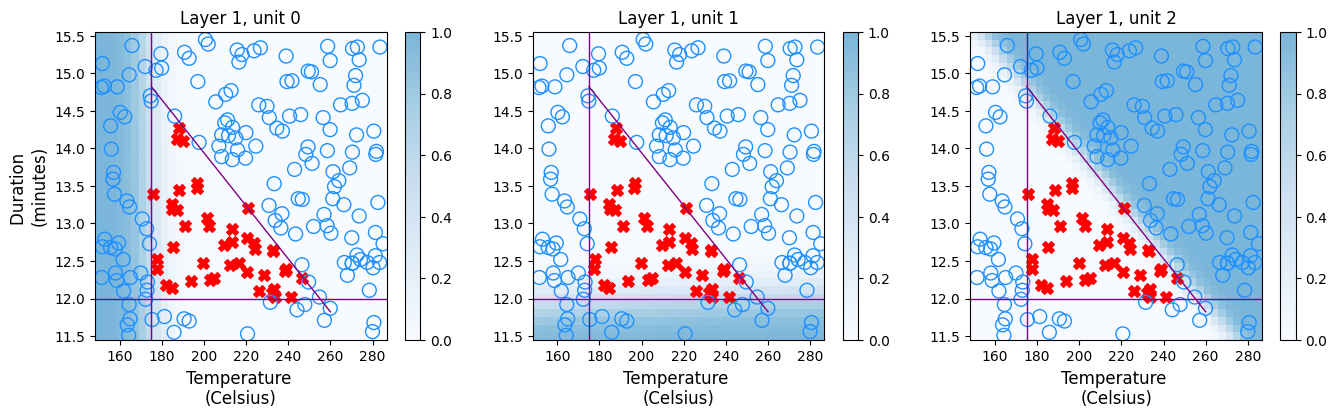

In [36]:
plt_layer(X, Y, W1_tmp2, b1_tmp2, norm_1)

The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below.

In [37]:
(
    tf.keras.activations.sigmoid(tf.constant([3], dtype = tf.float32)).numpy(),
    sigmoid(3)
)

(array([0.95257413], dtype=float32), 0.9525741268224334)

In [38]:
W2, b2

(array([[-41.500275],
        [-42.91971 ],
        [-48.16392 ]], dtype=float32),
 array([24.868309], dtype=float32))

In [39]:
def plt_output_unit(W, b):
    """plots a single unit function with 3 inputs"""
    steps=10
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x_ = np.linspace(0.0, 1.0, steps)
    y_ = np.linspace(0.0, 1.0, steps)
    z_ = np.linspace(0.0, 1.0, steps)
    x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

    d = np.zeros((steps, steps, steps))
    cmap = plt.cm.Blues
    for i in range(steps):
        for j in range(steps):
            for k in range(steps):
                v = np.array([x[i, j, k], y[i, j, k], z[i, j, k]]) # (numpy.ndarray, (3,))
                d[i, j, k] = tf.keras.activations.sigmoid(np.dot(v, W.reshape(-1, )) + b).numpy()

    pcm = ax.scatter(x, y, z, c=d, cmap=cmap, alpha=1)
    ax.set_xlabel("unit 0");
    ax.set_ylabel("unit 1");
    ax.set_zlabel("unit 2");
    ax.view_init(30, -120)
    ax.figure.colorbar(pcm, ax=ax)
    ax.set_title(f"Layer 2, output unit")

    plt.show()

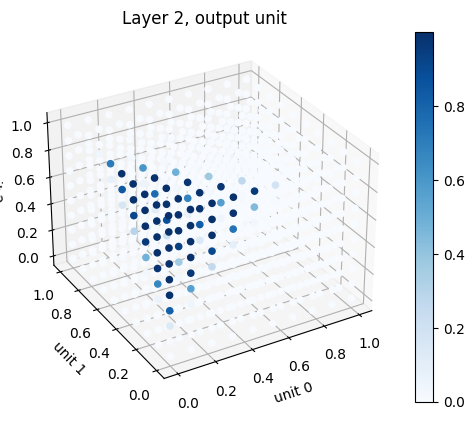

In [40]:
plt_output_unit(W2_tmp1, b2_tmp1)

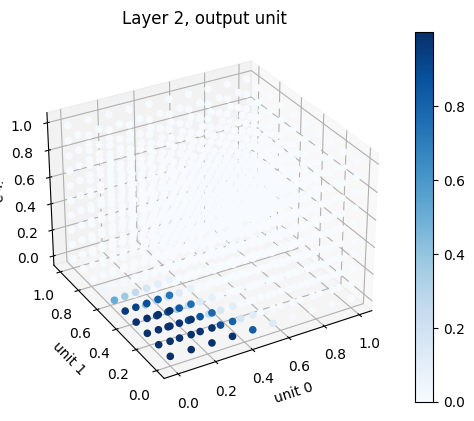

In [41]:
plt_output_unit(W2_tmp2, b2_tmp2)

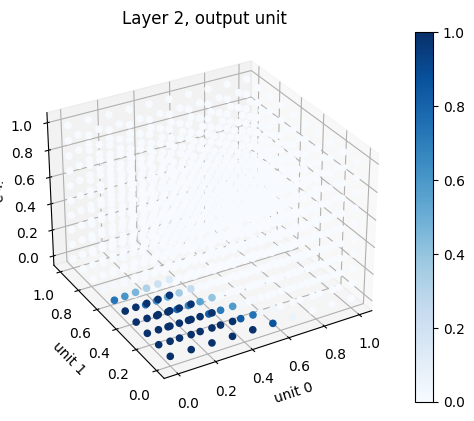

In [42]:
plt_output_unit(W2, b2)

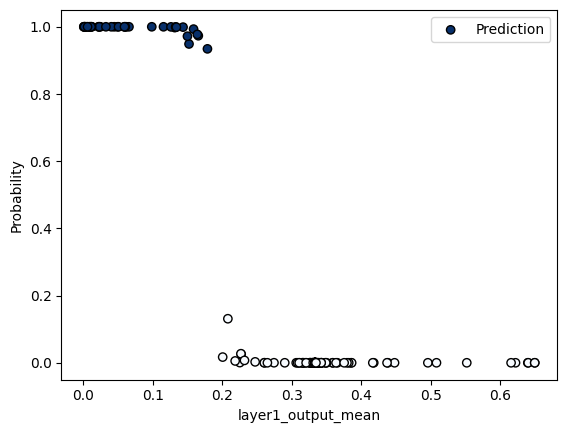

In [43]:
model_part = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer('layer1').output
)

layer1_output = model_part(Xn).numpy()
plt.scatter(layer1_output.mean(axis=1),
            predictions,
            c=y_hat,
            cmap=plt.cm.Blues,
            edgecolors='black',
            label='Prediction')
plt.xlabel('layer1_output_mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Network function

The final graph shows the whole network in action.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.
The following takes a moment to run

In [44]:
def plt_network(X, Y, netf):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    y = Y.reshape(-1, )
    tr = np.linspace(175, 260, 50)

    # plot prob on left side
    plt_prob(ax[0], netf)

    # plot original data on left side
    ax[0].scatter(X[y==1, 0], X[y==1, 1], s=70, marker='X', c='r', label='Good Roast')
    ax[0].scatter(X[y==0, 0], X[y==0, 1], s=100, marker='o', facecolor='none',
            edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
    ax[0].axhline(y=12, color='purple', linewidth=1)
    ax[0].axvline(x=175, color='purple', linewidth=1)
    ax[0].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
    ax[0].set_xlabel('Temperature\n(Celsius)', size=12)
    ax[0].set_ylabel('Duration\n(minutes)', size=12)
    ax[0].set_title('Network Probability')
    ax[0].legend(loc='upper right')

    fwb = netf(X)
    y_hat = (fwb > 0.5).astype(int).reshape(-1,)
    ax[1].scatter(X[y_hat==1, 0], X[y_hat==1, 1], s=70, marker='X', c='orange', label='Good Roast')
    ax[1].scatter(X[y_hat==0, 0], X[y_hat==0, 1], s=100, marker='o', facecolor='none',
            edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
    ax[1].axhline(y=12, color='purple', linewidth=1)
    ax[1].axvline(x=175, color='purple', linewidth=1)
    ax[1].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
    ax[1].set_xlabel('Temperature\n(Celsius)', size=12)
    ax[1].set_ylabel('Duration\n(minutes)', size=12)
    ax[1].set_title('Network Decision')
    ax[1].legend(loc='upper right')

    plt.show()

In [45]:
netf= lambda x : model.predict(norm_1(x), verbose=0)

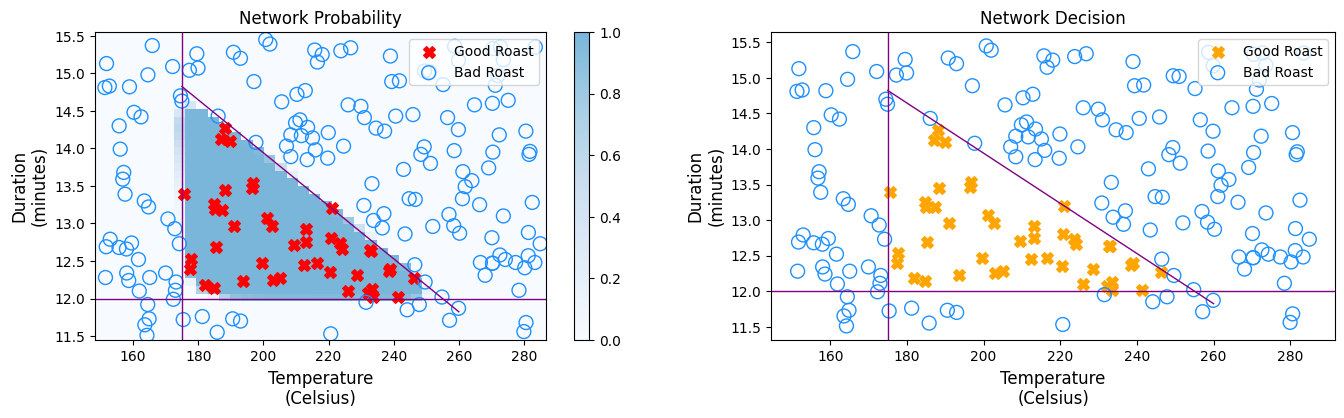

In [46]:
plt_network(X, Y, netf)